### 1.2 Practical 
#### 1.2.1 Linear Regression

In [5]:
## import packages
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [6]:
# Generate X
w_0 = 0.5
w_1 = -1.5
mean = [0]
cov  = [[0.2]]
X = []
t = []
for i in range(201):
    temp_x = -1 + 0.01*i
    X.append(temp_x)
    error = float(np.random.multivariate_normal(mean,cov))
    temp_t = w_0 * temp_x + w_1 + error
    t.append(temp_t)

# Generate t


    
    

#### Question 9:
* Set the prior distribution over W and visualize it
* Pick a single data point(x,t) and visualise the posterior distribution over W.
* Draw 5 samples from the posterior and plot the resulting functions.
* Repeat 2 - 3 by adding additional data points up to 7
* Given the plots explain the effect of adding more data on the posterior as well as the functions. How would you interpret this effect?
* Finally, test the exercise for different values of $\sigma$ ,c.g. 0.1, 0.4 and 0.8. How does your model account for data with varying noise levels? what is the effect on the posterior?

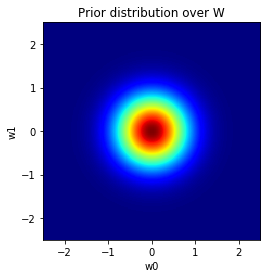

In [18]:
# Set the prior distribution over W and visualize it
mean     = [0, 0]  ####[W_0 , W_1]
sigma    = 0.2
cov      = [[sigma,0],[0,sigma]]
w_0_list =[]
w_1_list =[]

for i in range(200,-201,-2):
    temp_w0 = mean[0] + i * 0.01
    temp_w1 = mean[1] + i * 0.01
    w_0_list.append(temp_w0)
    w_1_list.append(temp_w1)
#print(w_0_list)
### plot
w_0_list, w_1_list = np.meshgrid(w_0_list, w_1_list)

# prior              = 1/(2*np.pi*sigma) * np.exp(-((w_0_list-mean[0])**2)/(2*sigma) - ((w_1_list-mean[1])**2)/(2*sigma))

prior = multivariate_normal(mean, cov)
pos = np.empty(w_0_list.shape + (2,))
pos[:, :, 0] = w_0_list
pos[:, :, 1] = w_1_list
p = prior.pdf(pos)
cs = plt.imshow(p,cmap ='jet',extent=(-2.5, 2.5, -2.5, 2.5))
ax = plt.gca()
ax.grid(False)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Prior distribution over W')
plt.show()


In [19]:
# Pick a single data point (x,t) and visualize the
# posterior distribution over W


# x1 = np.array([[X[0],0],[X[50],0],[X[100],0],[X[-50],0],[X[-1],0]])
# t1 = np.array([t[0],t[50],t[100],t[-50],t[4]])
def plot_posterior(x1,t1,sigma):
    sigma = sigma**0.5
    Sigma = sigma**2 * np.array([[1,0],[0,1]])
    w_0_list =[]
    w_1_list =[]

#     for i in range(200,-200,-2):
#         temp_w0 = 0 + i * 0.01
#         temp_w1 = 0 + i * 0.01
#         w_0_list.append(temp_w0)
#         w_1_list.append(temp_w1)
        
### plot
    w_0_list, w_1_list = np.mgrid[-2:2:.01, -2:2:.01]
    inv_cov_w = 1/(sigma**2) * np.dot(x1.T,x1) + np.linalg.inv(Sigma)
    cov   = np.linalg.inv(inv_cov_w)
    mean_w    = 1 / (sigma**2) * np.dot(np.dot(cov,x1.T),t1)
    #print(mean_w)

    
    #print(cov)
    #prior = multivariate_normal(mean_w, cov)
    pos = np.empty(w_0_list.shape + (2,))
    pos[:, :, 0] = w_0_list
    pos[:, :, 1] = w_1_list
    p = multivariate_normal.pdf(pos,mean_w, cov)
    
    cs = plt.contourf(w_0_list, w_1_list,p,cmap='jet',extend=[-2,2,-2,2])
    ax = plt.gca()
    ax.grid(False)
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('Posterior distribution over W')
    plt.show()

    return mean_w,cov

In [39]:
### randomly pick up data for test 1
def Sampling_posterior(k,sigma):
    
    picked_x =[]
    x1 = np.zeros((k,2))
    t1 = [0]*k
    for i in range(k):
  
        flag = True
        while flag == True:
            num = random.randint(0, 200)
       
            if num not in picked_x:
                picked_x.append(num)
                x1[i][0] = X[num]
                x1[i][1] = 1
                t1[i] = t[num]
                flag = False
            else:
                continue

    mean_w,cov_w = plot_posterior(x1,t1,sigma)
    print(mean_w)
    w0,w1 = np.random.multivariate_normal(mean_w, cov_w, 20).T
    y_total = []
    plt.figure()
    for i in range(20):
        y = []
        for temp_x in X:
        
            y_temp = w0[i] * temp_x + w1[i] 
            y.append(y_temp)
        plt.plot(X,y)
    plt.xlim((-1,1))
    plt.ylim((-2.5,2.5))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(['Data Space with Posterior distribution over W'])

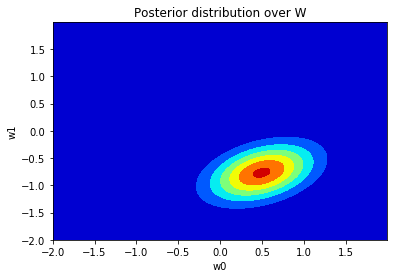

[ 0.49243667 -0.76943229]


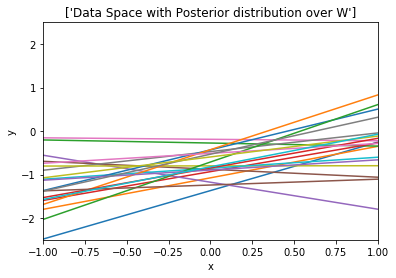

In [40]:
k = 1
sigma = 0.2
Sampling_posterior(k,sigma)

#### Testing :
* First test with different data sample, k = 1,5,20,100
* later on test with different sigma , sigma = 0.01,0.1,0.2, 0.4 under same number of data sample


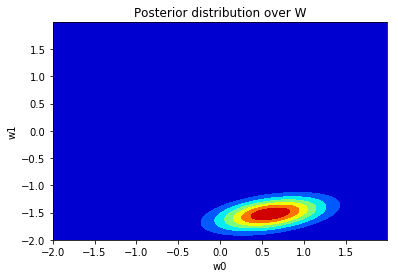

[ 0.59512157 -1.5239204 ]


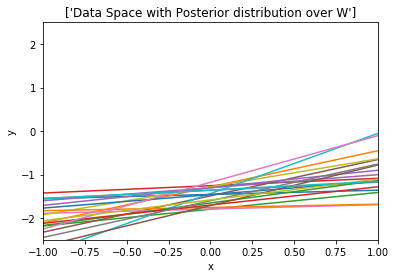

In [43]:
# k = 5 and sigma = 0.2
k = 5
sigma = 0.2
Sampling_posterior(k,sigma)

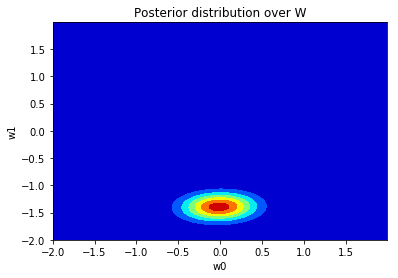

[-0.01402068 -1.3951279 ]


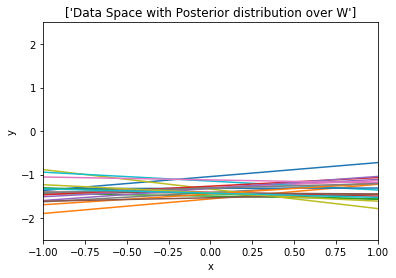

In [50]:
# k = 6 and sigma = 0.2
k = 6
sigma = 0.2
Sampling_posterior(k,sigma)

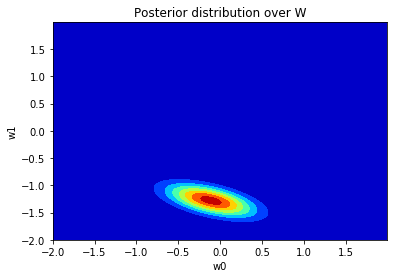

[-0.11218034 -1.27921557]


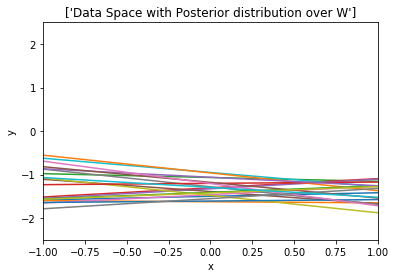

In [51]:
# k = 7 and sigma = 0.2
k = 7
sigma = 0.2
Sampling_posterior(k,sigma)

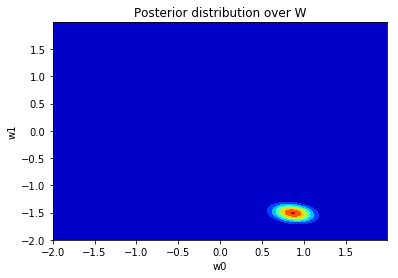

[ 0.86485123 -1.50847011]


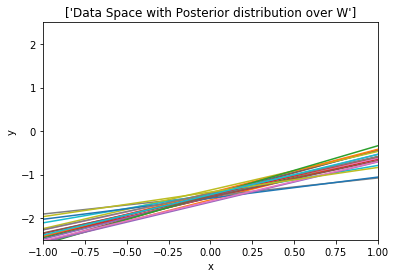

In [52]:
# k = 20 and sigma = 0.2
k = 20
sigma = 0.2
Sampling_posterior(k,sigma)

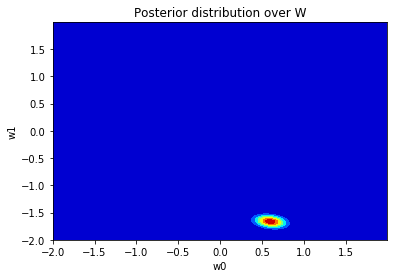

[ 0.5957124  -1.66405397]


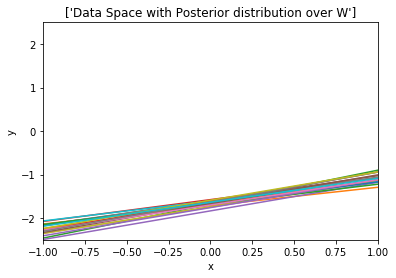

In [53]:
# k = 20 sigma = 0.1
k = 20
sigma = 0.1
Sampling_posterior(k,sigma)

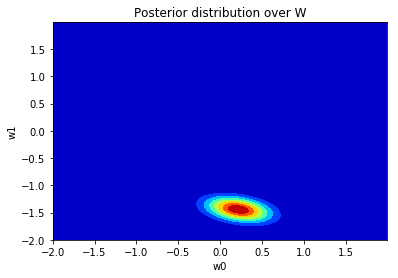

[ 0.21513889 -1.44332256]


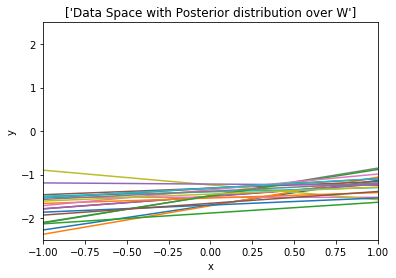

In [54]:
# k = 20 sigma = 0.4
k = 20
sigma = 0.4
Sampling_posterior(k,sigma)

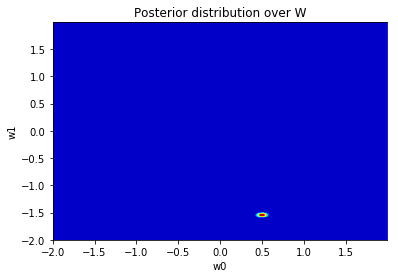

[ 0.49648412 -1.54368749]


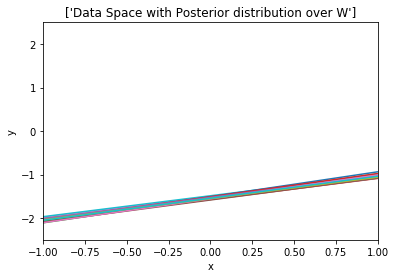

In [55]:
## k = 20 and sigma = 0.01
k = 20
sigma = 0.01
Sampling_posterior(k,sigma)